In [83]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [84]:
FIG_DIR = "/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/"

In [85]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended"
#robots = [4, 6]
seeds = [i for i in range(0, 30)]
print(seeds)
robots = [3,6,9,12,24,36,60,81,99,120,150]
rab_ranges = [4,8,12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [86]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_divison_labour_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [87]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_divison_labour_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [88]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('conflicts_'+str(k))
        n.append('belief_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('zone_collected_'+str(k))

    
    n.append('exp_finished')
    return n

In [89]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
    
    n.append('exp_finished')
    return n

In [90]:
def get_names_for_position_white(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 0):
            n.append('x_'+str(k))
            n.append('y_'+str(k))
    return n
    
    

In [91]:
def get_names_for_position_black(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 1):
            n.append('x_'+str(k))
            n.append('y_'+str(k))

    return n 
    

In [92]:
def get_names_for_position_nesters(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 2):
            n.append('x_'+str(k))
            n.append('y_'+str(k))
    
    return n 


Total collision per robot in the whole experiment, time_taken and estimate average. 

In [44]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()
total_conflicts = pd.DataFrame()

for robot in robots:
    for seed in seeds: 
        for range_ in rab_ranges:
            fname = get_name(robot,seed,range_)
            try:
                perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            except:
                print("error in reading file for seed: ",seed," and robot: ",robot," and range: ",range_)
                continue
            perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            df = pd.DataFrame(data=perf_frame)
            collision_sum = pd.DataFrame() 
            conflicts_sum = pd.DataFrame()
            time_ = pd.DataFrame()

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            conflicts = df.filter(regex='conflicts').tail(1).reset_index(drop=True)
            conflicts_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            conflicts_sum['conflicts_sum'] = conflicts.sum(axis='columns')/(robot*10)
            conflicts_sum['number_of_robots'] = robot
            conflicts_sum['seed'] = seed
            conflicts_sum['range'] = range_/10




            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True) 
            total_conflicts = pd.concat([total_conflicts,conflicts_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)
print(total_conflicts)




     exp_finished  collision_sum  number_of_robots  seed  range
0               1       6.366667                 3     0    0.4
1               1       5.800000                 3     0    0.8
2               1       5.033333                 3     0    1.2
3               1      17.600000                 3     1    0.4
4               1      17.600000                 3     1    0.8
..            ...            ...               ...   ...    ...
985             1     125.394667               150    28    0.8
986             1     125.394667               150    28    1.2
987             1     129.936000               150    29    0.4
988             1     129.936000               150    29    0.8
989             1     129.936000               150    29    1.2

[990 rows x 5 columns]
      time  exp_finished  number_of_robots  seed  range
0     72.7             1                 3     0    0.4
1     71.0             1                 3     0    0.8
2     50.3             1                

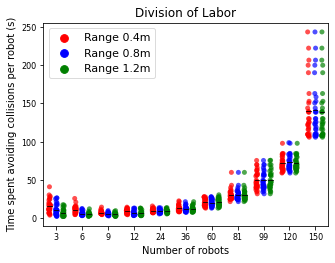

In [45]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Division of Labor")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time spent avoiding collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/heterogenity_collision_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

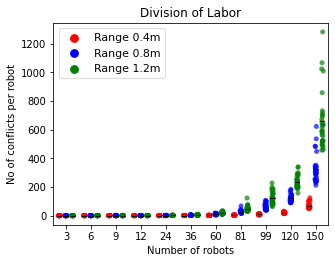

In [46]:
dx="number_of_robots"
dy="conflicts_sum"
dhue="range"
pal=["red","blue","green"]
data = total_conflicts

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Division of Labor")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.9},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("No of conflicts per robot",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/heterogenity_conflicts.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

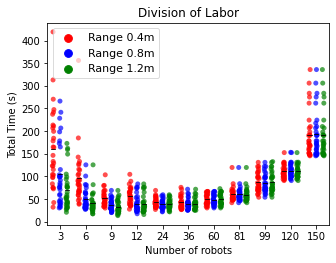

In [47]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Division of Labor")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/heterogenity_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

nest end stagnation plots


In [94]:
FIG_DIR = "/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/stagnation/hetero/"

In [95]:
robots = [150]
rab_ranges = [4]
threshold = 10
middle_percent = 70 
percent_start = 15
percent_end = 15
#seeds = [i for i in range(0, 30)]
bin_size = 0.2


In [96]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_nesters(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.tail(int(len(df) * percent_end / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]

            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    #plt.yticks([])
    #plt.rc('xtick', labelsize=8) 
    #plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=Nest, T=end)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    # if (robot==150):
    #         ax.set_ylabel("x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    
    plt.xlim([-2, 2.0])
    ax.set_xlabel("y (m)",fontsize=12)
    # plt.tight_layout(pad=0.1)
    plt.xticks(np.arange(-2,2.5,0.5))
    #plt.yticks(np.arange(-1.5,2.0,0.5))
    plt.savefig(FIG_DIR+"heatmap_nest_end_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_end)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [97]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_black(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.tail(int(len(df) * percent_end / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.55,3.75))
    plt.xticks([])
    #plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=B, T=end)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    if (robot==150):
            ax.set_ylabel("Stagnation heatmap\n x (m)",fontsize=12)
#     else:
    #ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-2, 1.5])
    plt.tight_layout(pad=1.3)
    #plt.yticks(np.arange(-2,2.5,0.5))
    plt.xticks(np.arange(-2,2.0,0.5))
    plt.savefig(FIG_DIR+"heatmap_black_end_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_end)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 255.6x270 with 0 Axes>

In [98]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_white(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.tail(int(len(df) * percent_end / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.55,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=A, T=end)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    #if (robot==150):""
    #        ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-1.5, 2])
    #plt.tight_layout(pad=0.5)
    plt.xticks(np.arange(-1.5,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_white_end_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_end)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 255.6x266.4 with 0 Axes>

In [99]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_white(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.head(int(len(df) * percent_start / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=A, T=start)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    #if (robot==150):
    #        ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-1.5, 2.0])
    #plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-1.5,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_white_start_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_start)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [100]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_black(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.head(int(len(df) * percent_start / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=B, T=start)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    if (robot==150):
            ax.set_ylabel("Stagnation heatmap\nx (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-2.0, 1.5])
    plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-2,2.0,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_black_start_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_start)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [101]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_nesters(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.head(int(len(df) * percent_start / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=Nest, T=start)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    #if (robot==150):
    #        ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-2.0, 2.0])
    plt.tight_layout(pad=0.1)
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_nest_start_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_start)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [102]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_nesters(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.iloc[int(len(df) * (50 - middle_percent/2)/ 100):int(len(df) * (50 + middle_percent/2)/ 100)]
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=Nest, T=middle)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    #if (robot==150):
    #        ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-2.0, 2.0])
    plt.tight_layout(pad=0.1)
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_nest_middle_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(middle_percent)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [103]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_black(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.iloc[int(len(df) * (50 - middle_percent/2)/ 100):int(len(df) * (50 + middle_percent/2)/ 100)]
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            #df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]


            #df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=B, T=middle)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    #plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    if (robot==150):
            ax.set_ylabel("Stagnation heatmap\nx (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-2.0, 1.5])
    plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-2,2.0,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_black_middle_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(middle_percent)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>

In [104]:

exp_x = []
exp_y = []

positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_nest = get_names_for_position_white(robot)
            df = pd.DataFrame(pos_frame)
            df = df[pos_frame_nest]
            df = df.iloc[int(len(df) * (50 - middle_percent/2)/ 100):int(len(df) * (50 + middle_percent/2)/ 100)]
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]

            agg_df['bin_x'] = pd.cut(agg_df["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['bin_y'] = pd.cut(agg_df["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            agg_df['combine_bin']= agg_df['robot'].astype(str)+agg_df['bin_x'].astype(str) + agg_df['bin_y'].astype(str)
            agg_df['Occurrences'] = agg_df.groupby((agg_df['combine_bin'] != agg_df['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = agg_df['combine_bin'] != agg_df['combine_bin'].shift(-1)
            df_result = agg_df[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.5,3.7))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("(N=150, Z=A, T=middle)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    #if (robot==150):
    plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,1500)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    #if (robot==150):
    #        ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
#     else:
#     ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.xlim([-1.5, 2.0])
    #plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-1.5,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"heatmap_white_middle_hetero_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(middle_percent)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 252x266.4 with 0 Axes>